## 讀取資料

In [71]:
import pandas as pd

#讀取資料
dataset = pd.read_csv('LoanStats.csv')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (0,19,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.



In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423814 entries, 0 to 423813
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 468.8+ MB


In [73]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [74]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 計算遺失值比例

In [75]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending=False)

total_cu_tl                            1.000000
sec_app_mort_acc                       1.000000
sec_app_revol_util                     1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_chargeoff_within_12_mths       1.000000
sec_app_collections_12_mths_ex_med     1.000000
sec_app_mths_since_last_major_derog    1.000000
sec_app_inq_last_6mths                 1.000000
sec_app_earliest_cr_line               1.000000
revol_bal_joint                        1.000000
inq_last_12m                           1.000000
inq_fi                                 1.000000
all_util                               1.000000
max_bal_bc                             1.000000
open_rv_24m                            1.000000
open_rv_12m                            1.000000
il_util                                1.000000
total_bal_il                           1.000000
mths_since_rcnt_il                     1.000000
open_il_24m                            1

In [76]:
((dataset.isna().sum() / len(dataset)) > 0.3).head()

id                  True
member_id           True
loan_amnt          False
funded_amnt        False
funded_amnt_inv    False
dtype: bool

In [77]:
import numpy as np
s = (dataset.isna().sum() / len(dataset)) > 0.3

s.where(s > 0.3)

id                                            1.0
member_id                                     1.0
loan_amnt                                     NaN
funded_amnt                                   NaN
funded_amnt_inv                               NaN
term                                          NaN
int_rate                                      NaN
installment                                   NaN
grade                                         NaN
sub_grade                                     NaN
emp_title                                     NaN
emp_length                                    NaN
home_ownership                                NaN
annual_inc                                    NaN
verification_status                           NaN
issue_d                                       NaN
loan_status                                   NaN
pymnt_plan                                    NaN
url                                           1.0
desc                                          1.0


## 刪除遺失值比例過高的欄位

In [78]:
dataset = dataset.iloc[:,2:111]         
empty_cols = [i for i in range(45,72)]   
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
#dataset.info()

In [79]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan, 'Late (16-30 days)', 'Default'],
      dtype=object)

## 目標編碼轉換

In [80]:
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]

In [81]:
#data_with_loanstatus_sliced.info()

In [82]:
dataset['loan_status'].head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [83]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget = data_with_loanstatus_sliced.replace({"loan_status": di})


In [84]:
Dataset_withBoolTarget['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## 探索遺失值

In [85]:
stats = Dataset_withBoolTarget.isnull().sum(axis = 1)

Populating the interactive namespace from numpy and matplotlib


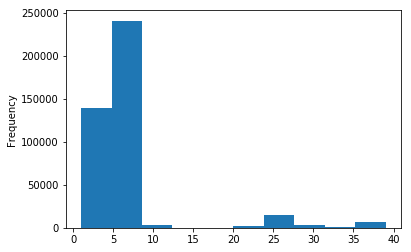

In [86]:
%pylab inline
stats.plot(kind = 'hist')

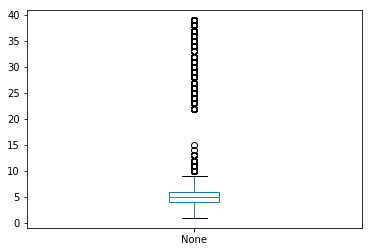

In [87]:
stats.plot(kind = 'box')

In [88]:
stats2 = Dataset_withBoolTarget.isnull().sum(axis = 0)

Populating the interactive namespace from numpy and matplotlib


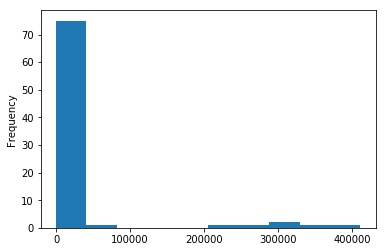

In [89]:
%pylab inline
stats2.plot(kind = 'hist')

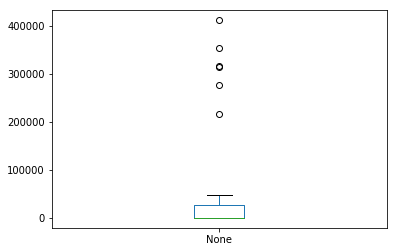

In [90]:
stats2.plot(kind = 'box')

In [91]:
Dataset_withBoolTarget.shape

(411273, 82)

## 刪除遺失值超過 340000 的欄位

In [92]:
dataset=Dataset_withBoolTarget.dropna(thresh = 340000,axis=1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 76)


In [93]:
stats2 = dataset.isnull().sum(axis = 0)

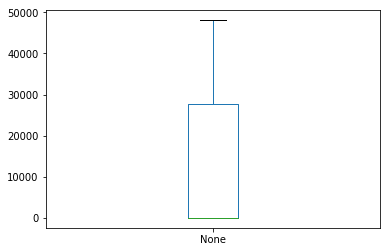

In [94]:
stats2.plot(kind = 'box')

## 移除遺失值過高的欄位

In [95]:
#移除欄位
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 54)


In [100]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending= False).head()

mths_since_recent_inq    0.116837
mo_sin_old_il_acct       0.099136
pct_tl_nvr_dlq           0.067824
avg_cur_bal              0.067481
mo_sin_old_rev_tl_op     0.067454
dtype: float64

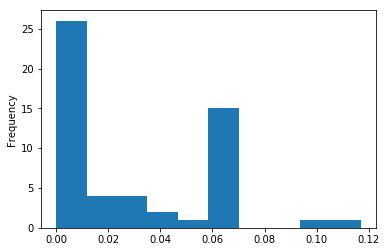

In [101]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'hist')

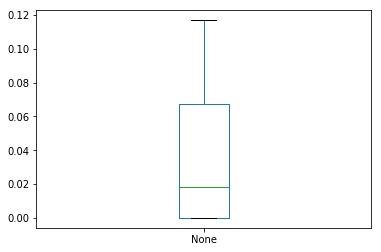

In [102]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'box')

## Plotly
- pip install plotly

In [48]:
!  pip install plotly

  Found existing installation: decorator 3.4.0
    Uninstalling decorator-3.4.0:
      Successfully uninstalled decorator-3.4.0
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [51]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [52]:
np.random.seed(42)
np.random.randint(1,42,6)

array([39, 29, 15,  8, 21, 39])

In [53]:
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

In [54]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
    )
]

In [55]:
pyo.iplot(data, filename='scatter1.html')

In [56]:
data = [
    go.Box(
        y=[0, 1, 1, 2, 3, 5, 8, 13, 21],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    )
]
pyo.iplot(data, filename='box.html')

## 欄位篩選

In [103]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] 

In [104]:
Final_data = dataset[features]

In [105]:
Final_data.shape

(411273, 18)

In [106]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [107]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 423811
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               391832 non-null object
annual_inc               411273 non-null float64
home_ownership           411273 non-null object
grade                    411273 non-null object
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null object
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float

In [108]:
?Final_data.select_dtypes

In [110]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [114]:
Final_data['int_rate'] = Final_data['int_rate'].map(lambda e: float(e.replace('%', '')) )

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [116]:
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [115]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


In [117]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [118]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [119]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership
0,3 years,MORTGAGE
1,10+ years,OWN
2,10+ years,MORTGAGE
3,5 years,MORTGAGE
4,4 years,RENT


In [121]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [122]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [123]:
Final_data.select_dtypes(include='object').head()

,emp_length
0,3 years
1,10+ years
2,10+ years
3,5 years
4,4 years


In [124]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [129]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')

In [131]:
import re
Final_data["emp_length"] = Final_data["emp_length"].map(lambda e: int(re.search('(\d+)', e).group(0)) )

In [132]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411273 entries, 0 to 411272
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null int64
annual_inc               411273 non-null float64
home_ownership           411273 non-null int64
grade                    411273 non-null int64
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float64